# Stats 503 hw3

### 1, ISLP chapter 4, conceptual exercise #1

$$p(X)=\frac{e^{\beta_0+\beta_1*X}}{1+e^{\beta_0+\beta_1*X}}$$
$$1-p(X)=1-\frac{e^{\beta_0+\beta_1*X}}{1+e^{\beta_0+\beta_1*X}}=\frac{1}{1+e^{\beta_0+\beta_1*X}}$$
$$\frac{p(X)}{1-p(X)}=\frac{\frac{e^{\beta_0+\beta_1*X}}{1+e^{\beta_0+\beta_1*X}}}{\frac{1}{1+e^{\beta_0+\beta_1*X}}}=e^{\beta_0+\beta_1*X}$$

### 2, ISLP chapter 4, conceptual exercise #4

#### (a)

0.05+0.05=0.1,
0.1/1=0.1,
the fraction is 10%

#### (b)

0.05+0.05=0.1,
0.1/1=0.1,
0.05+0.05=0.1,
0.1/1=0.1,
0.1*0.1=0.01,
the fraction is 1%

#### (c)

0.05+0.05=0.1,
0.1/1=0.1,
the fraction is $(0.1)^{100}$

#### (d)

for (a) the fraction is 0.1 while for (c) the fraction is $(0.1)^{100}$, which is much smaller compared with 0.1 and really close to 0, so we can get the conclusion that  a drawback of KNN when p is large is that there are very few training observations “near” any given test observation.

#### (e)

$$p=1: 0.1^{1/1}=0.1$$
$$p=2: 0.1^{1/2}=0.316$$
$$p=100:0.1^{1/100}=0.977$$

### 3, ISLP chapter 4, conceptual exercise #9

#### (a)

0.37/(1+0.37)=0.37/1.37=0.2701,
27.01% people will in fact default

#### (b)

let the odds be x, x/(1+x)=0.16, 0.84x=0.16, x=0.1905, odds is 0.1905

### 4,ISLP chapter 4, conceptual exercise #12, parts a, b, and c

#### (a)

$\hat{Pr}(Y=apple|X=x)=1-\hat{Pr}(Y=orange|X=x)=\frac{1}{1+exp(\hat{\beta_0}+\hat{\beta_1 x})}$

odds for orange vs apple=$\hat{Pr}(Y=orange|X=x)/\hat{Pr}(Y=apple|X=x)=exp(\hat{\beta_0}+\hat{\beta_1 x})$

log odds=$log(exp(\hat{\beta_0}+\hat{\beta_1 x}))=\hat{\beta_0}+\hat{\beta_1 x}$

#### (b)

$\hat{Pr}(Y=apple|X=x)=1-\hat{Pr}(Y=orange|X=x)=\frac{exp(\hat{\alpha_(apple0)}+\hat{\alpha_(apple1)}x)}{exp(\hat{\alpha_(apple0)}+\hat{\alpha_(apple1)}x)+exp(\hat{\alpha_(orange0)}+\hat{\alpha_(orange1)}x)}$

odds for orange vs apple:$\hat{Pr}(Y=orange|X=x)/\hat{Pr}(Y=apple|X=x)=\frac{exp(\hat{\alpha_(orange0)}+\hat{\alpha_(orange1)}x)}{exp(\hat{\alpha_(apple0)}+\hat{\alpha_(apple1)}x)}=exp(\hat{\alpha_(orange0)}+\hat{\alpha_(orange1)}x-\hat{\alpha_(apple0)}-\hat{\alpha_(apple1)}x)$

log odds=$log(exp(\hat{\alpha_(orange0)}+\hat{\alpha_(orange1)}x-\hat{\alpha_(apple0)}-\hat{\alpha_(apple1)}x))=\hat{\alpha_(orange0)}+\hat{\alpha_(orange1)}x-\hat{\alpha_(apple0)}-\hat{\alpha_(apple1)}x$

#### (c)

2-x=$\hat{\alpha_(orange0)}+\hat{\alpha_(orange1)}x-\hat{\alpha_(apple0)}-\hat{\alpha_(apple1)}x$

we have $\hat{\alpha_(orange0)}-\hat{\alpha_(apple0)}=2, \hat{\alpha_(orange1)}-\hat{\alpha_(apple1)}=-1$

use apple as referencing, then $\hat{\alpha_(apple0)}=0,\hat{\alpha_(apple1)}=0, \hat{\alpha_(orange0)}=2, \hat{\alpha_(orange1)}=-1$

### 5

#### (a) Predict the probability of getting an A for a student who studies 5 hours a week and has a GPA of 3.5 in other statistics courses

-4+0.05*5+1*3.5=3.75-4=-0.25

$P(pass)=exp(-0.25)/(1+exp(-0.25))=0.7788/1.7788=0.4378$

43.78% chance of getting A

#### (b)What are the odds that this student will get an A?

from (a) we have exp(-0.25)=0.7788

the odds is 0.7788

#### (c) How many hours a week does this student need to study for the model to predict a 50% chance of getting an A?

let the hour be x, -4+0.05x+3.5=0.05x-0.5

$P(pass)=exp(0.05x-0.5)/(1+exp(0.05x-0.5))>0.5$

exp(0.05x-0.5)>1

0.05x-0.5>0, x>10

10 hours a week needed

### 6

#### (a)

In [86]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
college_train=pd.read_csv("C:\\Users\\DELL\\Downloads\\college_train.csv")
college_test=pd.read_csv("C:\\Users\\DELL\\Downloads\\college_test.csv")
scaler = StandardScaler()
cotr["private"] = cotr["Private"].map({"Yes": 1, "No": 0})
X=cotr.iloc[:,2:19]
X= scaler.fit_transform(X)
Y=cotr["private"]
model = LogisticRegression(max_iter=5000, solver='lbfgs')
model.fit(X,Y)
cote["private"]=cote["Private"].map({"Yes":1,"No":0})
X1=cote.iloc[:,2:19]
X1= scaler.transform(X1)
Y1=cote["private"]
y_prob = model.predict_proba(X1)[:, 1]
nll = -np.sum(y_test * np.log(y_prob) + (1 - y_test) * np.log(1 - y_prob))
nll

16.719303439208034

#### (b)

In [92]:
from sklearn.metrics import confusion_matrix
y_prob = model.predict_proba(X1)[:,1]
y_pred= (y_prob > 0.5).astype(int)
tn, fp, fn, tp = confusion_matrix(Y1, y_pred).ravel()
print(fp / (fp + tn))
print(tp / (tp + fn))
print(fn / (fn + tp))
print(tn / (tn + fp))

0.030303030303030304
0.9468085106382979
0.05319148936170213
0.9696969696969697


#### (c)

In [94]:
y_prob = model.predict_proba(X1)[:,1]
y_pred= (y_prob > 0.9).astype(int)
tn, fp, fn, tp = confusion_matrix(Y1, y_pred).ravel()
print(fp / (fp + tn))
print(tp / (tp + fn))
print(fn / (fn + tp))
print(tn / (tn + fp))

0.030303030303030304
0.7659574468085106
0.23404255319148937
0.9696969696969697


#### (d)

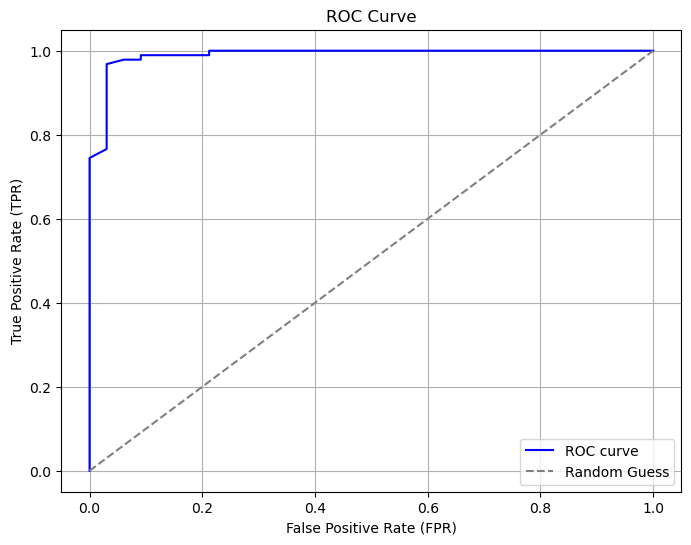

In [98]:
import matplotlib.pyplot as plt
import numpy as np
fpr_list = []
tpr_list = []
for t in np.linspace(0, 1, 101): 
    y_pred= (y_prob >t).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y1, y_pred).ravel()
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='blue', label="ROC curve")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### (e)

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y1, y_prob_yes)

0.9903288201160542

In [102]:
!jupyter nbconvert --to html stats_503_hw3_Chengrui_Zhao.ipynb

[NbConvertApp] Converting notebook stats_503_hw3_Chengrui_Zhao.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 357277 bytes to stats_503_hw3_Chengrui_Zhao.html
